In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a simple Feedforward Neural Network
model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Loading and Preprocessing the Image Data
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset from the provided file
from google.colab import files
uploaded = files.upload()  # choose cifar-10.npz from your computer

import numpy as np
data = np.load('cifar-10.npz')  # now it will load correctly

x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

# Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images (32x32x3 → 3072)
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Saving cifar-10.npz to cifar-10.npz


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),  # input layer
    Dropout(0.3),
    Dense(256, activation='relu'),                       # hidden layer
    Dropout(0.3),
    Dense(128, activation='relu'),                       # hidden layer
    Dense(10, activation='softmax')                      # output layer (10 classes)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print a summary of the model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.1875 - loss: 2.1980 - val_accuracy: 0.3100 - val_loss: 1.9037
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.2932 - loss: 1.9288 - val_accuracy: 0.3482 - val_loss: 1.8135
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.3117 - loss: 1.8734 - val_accuracy: 0.3572 - val_loss: 1.7976
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.3233 - loss: 1.8402 - val_accuracy: 0.3597 - val_loss: 1.7935
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.3371 - loss: 1.8119 - val_accuracy: 0.3770 - val_loss: 1.7521
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.3437 - loss: 1.8016 - val_accuracy: 0.3916 - val_loss: 1.7438
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.3528 - loss: 1.7804 - val_accuracy: 0.3778 - val_loss: 1.7362
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.3492 - loss: 1.7815 - 

✅ Test Accuracy: 42.17%


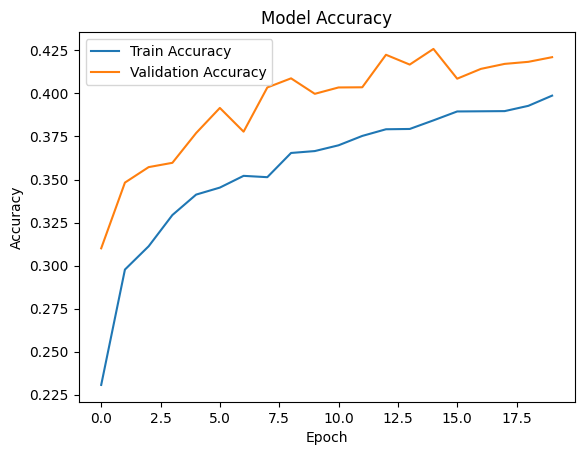

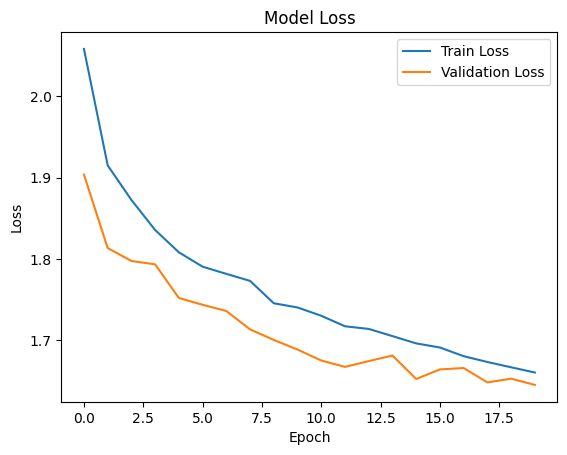

In [9]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")

# Plot training results
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()